## DATA CLEANING

In [1]:
import pandas as pd
import numpy as np

### Cek HANDLING MISSING VALUE-IGNORE TUPLE

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scraping_data_kai.csv')
my_df

,userName,at,content,score
0,Denniel Syahrul,2023-12-01 11:49:38,kaga bisa kebuka,2
1,ghea asmarandhana,2023-12-02 02:27:15,Mantap! semakin memudahkan mobilitas para peng...,5
2,Latifah Dena,2023-12-02 07:11:42,Aplikasinya sangat membantu,5
3,Hidup Baru,2023-12-02 07:41:45,Mantab,5
4,Dika Dewantara,2023-12-02 08:28:09,Sangat membantu untuk mengetahui jam kedatanga...,5
...,...,...,...,...
495,Putri Winny,2024-07-13 08:51:30,pdhl uda disambungin ke gojek/gopay tp tbtb pe...,2
496,Bang Yudizz,2024-07-13 12:05:22,Gajelas,1
497,Mahyudin Azis,2024-07-13 12:30:03,"Aplikasi pler, kalo belum siap sama era online...",1
498,De Rifqi,2024-07-14 02:55:40,Apk tai udh pencet login 15x ttep Bae gbisa pa...,1


In [3]:
my_df.shape

(500, 4)

In [4]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  500 non-null    object
 1   at        500 non-null    object
 2   content   500 non-null    object
 3   score     500 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [5]:
my_df.isna()

,userName,at,content,score
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
495,False,False,False,False
496,False,False,False,False
497,False,False,False,False
498,False,False,False,False


In [6]:
my_df.isna().any()

userName    False
at          False
content     False
score       False
dtype: bool

In [7]:
my_df.describe()

,score
count,500.000000
mean,1.782000
std,1.367559
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [8]:
my_df.isnull().sum()

userName    0
at          0
content     0
score       0
dtype: int64

### CLEANING

In [9]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 7.6 MB/s eta 0:00:00


In [10]:
import re,string
import emoji

In [11]:
import re,string
import emoji
def cleaning(text):
    text= text.strip()
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+',' ', text)
    text = re.sub(r'\[[0-9]*\]',' ',text)
    text=re.sub(r' [^\w\s]', '', text)
    text = re.sub(r'\d',' ',text)
    text = re.sub(r'\s+',' ', text)
    text = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', ' ', text)
    emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags=re.UNICODE)
    text = emoji_pattern.sub('', text)
    text = emoji.demojize(text, delimiters=('#', '#'))

    # Menghapus teks di dalam tanda #
    text = re.sub(r'#(.*?)#', r'', text)
    return text
my_df['data_cleaning'] = my_df['content'].apply(cleaning)

### CASE FOLDING

In [12]:
def case_folding(text):
    text = text.lower()
    return text

In [13]:
my_df['case_folding'] = my_df['data_cleaning'].apply(case_folding)
my_df.head()

,userName,at,content,score,data_cleaning,case_folding
0,Denniel Syahrul,2023-12-01 11:49:38,kaga bisa kebuka,2,kaga bisa kebuka,kaga bisa kebuka
1,ghea asmarandhana,2023-12-02 02:27:15,Mantap! semakin memudahkan mobilitas para peng...,5,Mantap semakin memudahkan mobilitas para pengg...,mantap semakin memudahkan mobilitas para pengg...
2,Latifah Dena,2023-12-02 07:11:42,Aplikasinya sangat membantu,5,Aplikasinya sangat membantu,aplikasinya sangat membantu
3,Hidup Baru,2023-12-02 07:41:45,Mantab,5,Mantab,mantab
4,Dika Dewantara,2023-12-02 08:28:09,Sangat membantu untuk mengetahui jam kedatanga...,5,Sangat membantu untuk mengetahui jam kedatanga...,sangat membantu untuk mengetahui jam kedatanga...


In [14]:
# Mengganti isi kolom 'content' dengan hasil 'case_folding'
my_df['content'] = my_df['case_folding']

# Menghapus kolom 'case_folding' karena sudah tidak diperlukan lagi
my_df = my_df[['userName','at','content','score']]
my_df.head()

,userName,at,content,score
0,Denniel Syahrul,2023-12-01 11:49:38,kaga bisa kebuka,2
1,ghea asmarandhana,2023-12-02 02:27:15,mantap semakin memudahkan mobilitas para pengg...,5
2,Latifah Dena,2023-12-02 07:11:42,aplikasinya sangat membantu,5
3,Hidup Baru,2023-12-02 07:41:45,mantab,5
4,Dika Dewantara,2023-12-02 08:28:09,sangat membantu untuk mengetahui jam kedatanga...,5


In [15]:
my_df.to_csv('data_cleaning.csv', index = False)

## TEXT PREPROCESSING

In [16]:
import pandas as pd
data = pd.read_csv('data_cleaning.csv')
data.head(25)

,userName,at,content,score
0,Denniel Syahrul,2023-12-01 11:49:38,kaga bisa kebuka,2
1,ghea asmarandhana,2023-12-02 02:27:15,mantap semakin memudahkan mobilitas para pengg...,5
2,Latifah Dena,2023-12-02 07:11:42,aplikasinya sangat membantu,5
3,Hidup Baru,2023-12-02 07:41:45,mantab,5
4,Dika Dewantara,2023-12-02 08:28:09,sangat membantu untuk mengetahui jam kedatanga...,5
5,Putra Miftaul Huda,2023-12-03 03:02:03,suka eror,1
6,Farel Iqbal,2023-12-03 05:49:25,ga jelas udh di download gabisa dibuna,1
7,VIKSMARD 25,2023-12-03 19:44:39,saat daftar menggunakan kata spesial ngebug ti...,1
8,Lilik Andrianto,2023-12-04 10:18:43,beda dg kai access ya,5
9,Kristian Sutoyo,2023-12-05 11:51:15,aksesnya lama ga bisa cek kmt ga bisa daftar s...,1


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re,string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from wordcloud import WordCloud
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#### Tokenizing

In [18]:
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

data['tokenizing'] = data['content'].apply(tokenize_text)
data


,userName,at,content,score,tokenizing
0,Denniel Syahrul,2023-12-01 11:49:38,kaga bisa kebuka,2,"[kaga, bisa, kebuka]"
1,ghea asmarandhana,2023-12-02 02:27:15,mantap semakin memudahkan mobilitas para pengg...,5,"[mantap, semakin, memudahkan, mobilitas, para,..."
2,Latifah Dena,2023-12-02 07:11:42,aplikasinya sangat membantu,5,"[aplikasinya, sangat, membantu]"
3,Hidup Baru,2023-12-02 07:41:45,mantab,5,[mantab]
4,Dika Dewantara,2023-12-02 08:28:09,sangat membantu untuk mengetahui jam kedatanga...,5,"[sangat, membantu, untuk, mengetahui, jam, ked..."
...,...,...,...,...,...
495,Putri Winny,2024-07-13 08:51:30,pdhl uda disambungin ke gojek gopay tp tbtb pe...,2,"[pdhl, uda, disambungin, ke, gojek, gopay, tp,..."
496,Bang Yudizz,2024-07-13 12:05:22,gajelas,1,[gajelas]
497,Mahyudin Azis,2024-07-13 12:30:03,aplikasi pler kalo belum siap sama era online ...,1,"[aplikasi, pler, kalo, belum, siap, sama, era,..."
498,De Rifqi,2024-07-14 02:55:40,apk tai udh pencet login x ttep bae gbisa pada...,1,"[apk, tai, udh, pencet, login, x, ttep, bae, g..."


#### Normalize

In [19]:

# Load data dari file CSV normalisasi.csv
normal_data = pd.read_csv('/content/normalisasi.csv', header=0)

normalized_word_dict = {}
for index, row in normal_data.iterrows():
    if row['aktip'] not in normalized_word_dict:  # Assuming 'kata' is the column name
        normalized_word_dict[row['aktip']] = row['aktif']  # Assuming 'normalisasi' is the column name

def normalized_term (document):
     return [normalized_word_dict [term] if term in
             normalized_word_dict else term for term in document]
data['normalize'] = data['tokenizing'].apply(normalized_term)
data


,userName,at,content,score,tokenizing,normalize
0,Denniel Syahrul,2023-12-01 11:49:38,kaga bisa kebuka,2,"[kaga, bisa, kebuka]","[tidak, bisa, buka]"
1,ghea asmarandhana,2023-12-02 02:27:15,mantap semakin memudahkan mobilitas para pengg...,5,"[mantap, semakin, memudahkan, mobilitas, para,...","[mantap, semakin, memudahkan, mobilitas, para,..."
2,Latifah Dena,2023-12-02 07:11:42,aplikasinya sangat membantu,5,"[aplikasinya, sangat, membantu]","[aplikasinya, sangat, membantu]"
3,Hidup Baru,2023-12-02 07:41:45,mantab,5,[mantab],[mantap]
4,Dika Dewantara,2023-12-02 08:28:09,sangat membantu untuk mengetahui jam kedatanga...,5,"[sangat, membantu, untuk, mengetahui, jam, ked...","[sangat, membantu, untuk, mengetahui, jam, ked..."
...,...,...,...,...,...,...
495,Putri Winny,2024-07-13 08:51:30,pdhl uda disambungin ke gojek gopay tp tbtb pe...,2,"[pdhl, uda, disambungin, ke, gojek, gopay, tp,...","[padahal, sudah, disambungin, ke, ojek online,..."
496,Bang Yudizz,2024-07-13 12:05:22,gajelas,1,[gajelas],[tidak jelas]
497,Mahyudin Azis,2024-07-13 12:30:03,aplikasi pler kalo belum siap sama era online ...,1,"[aplikasi, pler, kalo, belum, siap, sama, era,...","[aplikasi, pler, kalau, belum, siap, sama, era..."
498,De Rifqi,2024-07-14 02:55:40,apk tai udh pencet login x ttep bae gbisa pada...,1,"[apk, tai, udh, pencet, login, x, ttep, bae, g...","[aplikasi, kotoran, sudah, pencet, login, sang..."


#### Stopword Removal

In [20]:

stop = set(stopwords.words('indonesian'))

def stopwords(text):
    text = [word for word in text if word not in stop]
    return text

data['stopword_removal'] = data['normalize'].apply(stopwords)
data

,userName,at,content,score,tokenizing,normalize,stopword_removal
0,Denniel Syahrul,2023-12-01 11:49:38,kaga bisa kebuka,2,"[kaga, bisa, kebuka]","[tidak, bisa, buka]",[buka]
1,ghea asmarandhana,2023-12-02 02:27:15,mantap semakin memudahkan mobilitas para pengg...,5,"[mantap, semakin, memudahkan, mobilitas, para,...","[mantap, semakin, memudahkan, mobilitas, para,...","[mantap, memudahkan, mobilitas, penggunanya]"
2,Latifah Dena,2023-12-02 07:11:42,aplikasinya sangat membantu,5,"[aplikasinya, sangat, membantu]","[aplikasinya, sangat, membantu]","[aplikasinya, membantu]"
3,Hidup Baru,2023-12-02 07:41:45,mantab,5,[mantab],[mantap],[mantap]
4,Dika Dewantara,2023-12-02 08:28:09,sangat membantu untuk mengetahui jam kedatanga...,5,"[sangat, membantu, untuk, mengetahui, jam, ked...","[sangat, membantu, untuk, mengetahui, jam, ked...","[membantu, jam, kedatangan, kereta, memudahkan..."
...,...,...,...,...,...,...,...
495,Putri Winny,2024-07-13 08:51:30,pdhl uda disambungin ke gojek gopay tp tbtb pe...,2,"[pdhl, uda, disambungin, ke, gojek, gopay, tp,...","[padahal, sudah, disambungin, ke, ojek online,...","[disambungin, ojek online, gopay, tiba tiba, p..."
496,Bang Yudizz,2024-07-13 12:05:22,gajelas,1,[gajelas],[tidak jelas],[tidak jelas]
497,Mahyudin Azis,2024-07-13 12:30:03,aplikasi pler kalo belum siap sama era online ...,1,"[aplikasi, pler, kalo, belum, siap, sama, era,...","[aplikasi, pler, kalau, belum, siap, sama, era...","[aplikasi, pler, era, online, era, digital, me..."
498,De Rifqi,2024-07-14 02:55:40,apk tai udh pencet login x ttep bae gbisa pada...,1,"[apk, tai, udh, pencet, login, x, ttep, bae, g...","[aplikasi, kotoran, sudah, pencet, login, sang...","[aplikasi, kotoran, pencet, login, ttep, bae, ..."


#### Stemming

In [21]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.3 MB/s eta 0:00:00


In [22]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 16.3 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=20daf2eabeb1a4d50104ef8f8e27b0d04f2f028ddd555f71f49d000426236569
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [23]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data['stopword_removal']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(term,":" ,term_dict[term])
    print(hitung)
    print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data['stemmer'] = data['stopword_removal'].apply(lambda x:' '.join(get_stemmed_term(x)))
data

buka : buka
1
------------------------
mantap : mantap
2
------------------------
memudahkan : mudah
3
------------------------
mobilitas : mobilitas
4
------------------------
penggunanya : guna
5
------------------------
aplikasinya : aplikasi
6
------------------------
membantu : bantu
7
------------------------
jam : jam
8
------------------------
kedatangan : datang
9
------------------------
kereta : kereta
10
------------------------
saldo : saldo
11
------------------------
kmt : kmt
12
------------------------
mengantri : antri
13
------------------------
loket : loket
14
------------------------
suka : suka
15
------------------------
error : error
16
------------------------
unduh : unduh
17
------------------------
tidak bisa : tidak bisa
18
------------------------
dibuna : buna
19
------------------------
daftar : daftar
20
------------------------
spesial : spesial
21
------------------------
bug : bug
22
------------------------
beda : beda
23
------------------------
k

,userName,at,content,score,tokenizing,normalize,stopword_removal,stemmer
0,Denniel Syahrul,2023-12-01 11:49:38,kaga bisa kebuka,2,"[kaga, bisa, kebuka]","[tidak, bisa, buka]",[buka],buka
1,ghea asmarandhana,2023-12-02 02:27:15,mantap semakin memudahkan mobilitas para pengg...,5,"[mantap, semakin, memudahkan, mobilitas, para,...","[mantap, semakin, memudahkan, mobilitas, para,...","[mantap, memudahkan, mobilitas, penggunanya]",mantap mudah mobilitas guna
2,Latifah Dena,2023-12-02 07:11:42,aplikasinya sangat membantu,5,"[aplikasinya, sangat, membantu]","[aplikasinya, sangat, membantu]","[aplikasinya, membantu]",aplikasi bantu
3,Hidup Baru,2023-12-02 07:41:45,mantab,5,[mantab],[mantap],[mantap],mantap
4,Dika Dewantara,2023-12-02 08:28:09,sangat membantu untuk mengetahui jam kedatanga...,5,"[sangat, membantu, untuk, mengetahui, jam, ked...","[sangat, membantu, untuk, mengetahui, jam, ked...","[membantu, jam, kedatangan, kereta, memudahkan...",bantu jam datang kereta mudah saldo kmt antri ...
...,...,...,...,...,...,...,...,...
495,Putri Winny,2024-07-13 08:51:30,pdhl uda disambungin ke gojek gopay tp tbtb pe...,2,"[pdhl, uda, disambungin, ke, gojek, gopay, tp,...","[padahal, sudah, disambungin, ke, ojek online,...","[disambungin, ojek online, gopay, tiba tiba, p...",disambungin ojek online gopay tiba tiba bayar ...
496,Bang Yudizz,2024-07-13 12:05:22,gajelas,1,[gajelas],[tidak jelas],[tidak jelas],tidak jelas
497,Mahyudin Azis,2024-07-13 12:30:03,aplikasi pler kalo belum siap sama era online ...,1,"[aplikasi, pler, kalo, belum, siap, sama, era,...","[aplikasi, pler, kalau, belum, siap, sama, era...","[aplikasi, pler, era, online, era, digital, me...",aplikasi pler era online era digital paksa pler
498,De Rifqi,2024-07-14 02:55:40,apk tai udh pencet login x ttep bae gbisa pada...,1,"[apk, tai, udh, pencet, login, x, ttep, bae, g...","[aplikasi, kotoran, sudah, pencet, login, sang...","[aplikasi, kotoran, pencet, login, ttep, bae, ...",aplikasi kotor pencet login ttep bae tidak bis...


In [24]:
rowing = data.iloc[328]
print(rowing)

userName                  Adang Heryana
at                  2024-05-02 08:29:40
content                            baik
score                                 5
tokenizing                       [baik]
normalize                        [baik]
stopword_removal                     []
stemmer                                
Name: 328, dtype: object


### SIMPAN DATA

In [25]:
data['content'] = data['stemmer']
data = data[['userName','at','content','score']]
sorted_data = data.sort_values(by='at', ascending=True)
sorted_data

,userName,at,content,score
0,Denniel Syahrul,2023-12-01 11:49:38,buka,2
1,ghea asmarandhana,2023-12-02 02:27:15,mantap mudah mobilitas guna,5
2,Latifah Dena,2023-12-02 07:11:42,aplikasi bantu,5
3,Hidup Baru,2023-12-02 07:41:45,mantap,5
4,Dika Dewantara,2023-12-02 08:28:09,bantu jam datang kereta mudah saldo kmt antri ...,5
...,...,...,...,...
495,Putri Winny,2024-07-13 08:51:30,disambungin ojek online gopay tiba tiba bayar ...,2
496,Bang Yudizz,2024-07-13 12:05:22,tidak jelas,1
497,Mahyudin Azis,2024-07-13 12:30:03,aplikasi pler era online era digital paksa pler,1
498,De Rifqi,2024-07-14 02:55:40,aplikasi kotor pencet login ttep bae tidak bis...,1


In [26]:
data.isna().sum()
data.isnull().sum()

userName    0
at          0
content     0
score       0
dtype: int64

In [27]:
sorted_data.to_csv('text_preprocessing.csv', index=False)

## LABELING

In [28]:
import pandas as pd

In [29]:
df_label = pd.read_csv('/content/text_preprocessing.csv')
df_label

,userName,at,content,score
0,Denniel Syahrul,2023-12-01 11:49:38,buka,2
1,ghea asmarandhana,2023-12-02 02:27:15,mantap mudah mobilitas guna,5
2,Latifah Dena,2023-12-02 07:11:42,aplikasi bantu,5
3,Hidup Baru,2023-12-02 07:41:45,mantap,5
4,Dika Dewantara,2023-12-02 08:28:09,bantu jam datang kereta mudah saldo kmt antri ...,5
...,...,...,...,...
495,Putri Winny,2024-07-13 08:51:30,disambungin ojek online gopay tiba tiba bayar ...,2
496,Bang Yudizz,2024-07-13 12:05:22,tidak jelas,1
497,Mahyudin Azis,2024-07-13 12:30:03,aplikasi pler era online era digital paksa pler,1
498,De Rifqi,2024-07-14 02:55:40,aplikasi kotor pencet login ttep bae tidak bis...,1


In [30]:
df_label = df_label.dropna()

In [31]:
def labelbaru(score):
  if score < 3:
    return 'Negatif'
  else:
    return 'Positif'

df_label['Label'] = df_label['score'].apply(labelbaru)
df_label

<ipython-input-31-92c8172177ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label['Label'] = df_label['score'].apply(labelbaru)


,userName,at,content,score,Label
0,Denniel Syahrul,2023-12-01 11:49:38,buka,2,Negatif
1,ghea asmarandhana,2023-12-02 02:27:15,mantap mudah mobilitas guna,5,Positif
2,Latifah Dena,2023-12-02 07:11:42,aplikasi bantu,5,Positif
3,Hidup Baru,2023-12-02 07:41:45,mantap,5,Positif
4,Dika Dewantara,2023-12-02 08:28:09,bantu jam datang kereta mudah saldo kmt antri ...,5,Positif
...,...,...,...,...,...
495,Putri Winny,2024-07-13 08:51:30,disambungin ojek online gopay tiba tiba bayar ...,2,Negatif
496,Bang Yudizz,2024-07-13 12:05:22,tidak jelas,1,Negatif
497,Mahyudin Azis,2024-07-13 12:30:03,aplikasi pler era online era digital paksa pler,1,Negatif
498,De Rifqi,2024-07-14 02:55:40,aplikasi kotor pencet login ttep bae tidak bis...,1,Negatif


In [32]:
df_label.to_csv('data_labeling.csv', index=False)

## VISUALISASI

### Distribusi Kelas dan Wordcloud

In [33]:
!pip install wordcloud

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [35]:
df_visual = pd.read_csv('/content/data_labeling.csv')
df_visual

,userName,at,content,score,Label
0,Denniel Syahrul,2023-12-01 11:49:38,buka,2,Negatif
1,ghea asmarandhana,2023-12-02 02:27:15,mantap mudah mobilitas guna,5,Positif
2,Latifah Dena,2023-12-02 07:11:42,aplikasi bantu,5,Positif
3,Hidup Baru,2023-12-02 07:41:45,mantap,5,Positif
4,Dika Dewantara,2023-12-02 08:28:09,bantu jam datang kereta mudah saldo kmt antri ...,5,Positif
...,...,...,...,...,...
491,Putri Winny,2024-07-13 08:51:30,disambungin ojek online gopay tiba tiba bayar ...,2,Negatif
492,Bang Yudizz,2024-07-13 12:05:22,tidak jelas,1,Negatif
493,Mahyudin Azis,2024-07-13 12:30:03,aplikasi pler era online era digital paksa pler,1,Negatif
494,De Rifqi,2024-07-14 02:55:40,aplikasi kotor pencet login ttep bae tidak bis...,1,Negatif


#### Distribusi Kelas

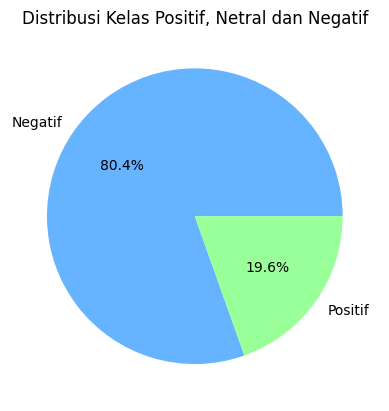

Jumlah data untuk setiap kelas:
jumlah Negatif: 399
jumlah Positif: 97


In [36]:
class_distribution = df_visual['Label'].value_counts()

# Plotting pie chart
class_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99','#ffcc99'])
plt.title('Distribusi Kelas Positif, Netral dan Negatif')
plt.ylabel('')  # Untuk menghilangkan label sumbu y
plt.show()

print("Jumlah data untuk setiap kelas:")
for label, count in class_distribution.items():
    print(f"jumlah {label}: {count}")

In [37]:
missing_indices = df_visual[df_visual['content'].isnull()].index.tolist()

print("Indeks baris yang memiliki nilai kosong di kolom 'content':")
print(missing_indices)
row = df_visual.iloc[328]
print(row)

Indeks baris yang memiliki nilai kosong di kolom 'content':
[]
userName         Anang Setiawan
at          2024-05-03 09:02:31
content     daftar ribet banget
score                         1
Label                   Negatif
Name: 328, dtype: object


In [38]:
df_visual.isnull().sum()

userName    0
at          0
content     0
score       0
Label       0
dtype: int64

#### Menampilkan semua data Negatif

In [39]:
train_negatif = df_visual[df_visual['Label'] == 'Negatif']
train_negatif

,userName,at,content,score,Label
0,Denniel Syahrul,2023-12-01 11:49:38,buka,2,Negatif
5,Putra Miftaul Huda,2023-12-03 03:02:03,suka error,1,Negatif
6,Farel Iqbal,2023-12-03 05:49:25,unduh tidak bisa buna,1,Negatif
7,VIKSMARD 25,2023-12-03 19:44:39,daftar spesial bug,1,Negatif
9,Kristian Sutoyo,2023-12-05 11:51:15,akses cek kmt daftar coba notif,1,Negatif
...,...,...,...,...,...
491,Putri Winny,2024-07-13 08:51:30,disambungin ojek online gopay tiba tiba bayar ...,2,Negatif
492,Bang Yudizz,2024-07-13 12:05:22,tidak jelas,1,Negatif
493,Mahyudin Azis,2024-07-13 12:30:03,aplikasi pler era online era digital paksa pler,1,Negatif
494,De Rifqi,2024-07-14 02:55:40,aplikasi kotor pencet login ttep bae tidak bis...,1,Negatif


In [40]:
train_negatif.isnull().sum()

userName    0
at          0
content     0
score       0
Label       0
dtype: int64

##### Wordcloud Label Negatif

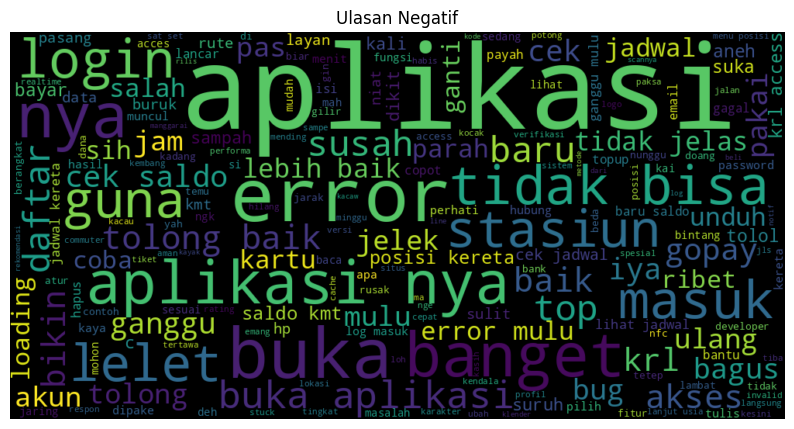

In [41]:
teks_negatif = ' '.join(train_negatif['content'])

wordcloud = WordCloud(width=1000, height=500, max_font_size=150, random_state=42).generate(teks_negatif)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Negatif")
plt.show()

#### Menampilkan semua data Positif

In [42]:
train_positif = df_visual[df_visual['Label'] == 'Positif']
train_positif

,userName,at,content,score,Label
1,ghea asmarandhana,2023-12-02 02:27:15,mantap mudah mobilitas guna,5,Positif
2,Latifah Dena,2023-12-02 07:11:42,aplikasi bantu,5,Positif
3,Hidup Baru,2023-12-02 07:41:45,mantap,5,Positif
4,Dika Dewantara,2023-12-02 08:28:09,bantu jam datang kereta mudah saldo kmt antri ...,5,Positif
8,Lilik Andrianto,2023-12-04 10:18:43,beda kai access iya,5,Positif
...,...,...,...,...,...
435,Fery Yoes Chiel,2024-06-25 16:00:04,halaman promo lebih baik awal aplikasi slide b...,4,Positif
436,Hary Syahputra,2024-06-25 17:37:22,bantu,5,Positif
442,Muhammad Deni Deni,2024-06-28 16:28:27,daftar susah banget atur sandi nya ribet,3,Positif
460,Aji Yudha,2024-07-07 23:37:29,aplikasi nya bagus lelet ganggu aplikasi,3,Positif


##### Wordcloud Label Positif

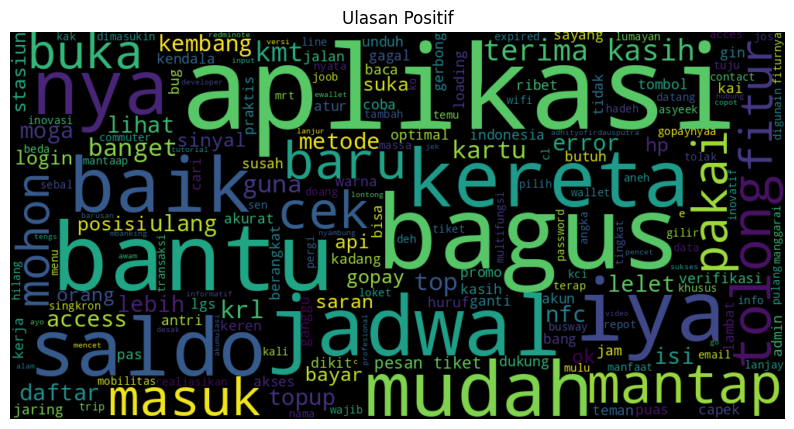

In [43]:
teks_positif = ' '.join(train_positif['content'])

wordcloud = WordCloud(width=1000, height=500, max_font_size=150, random_state=42).generate(teks_positif)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.show()

#### Perbandingan

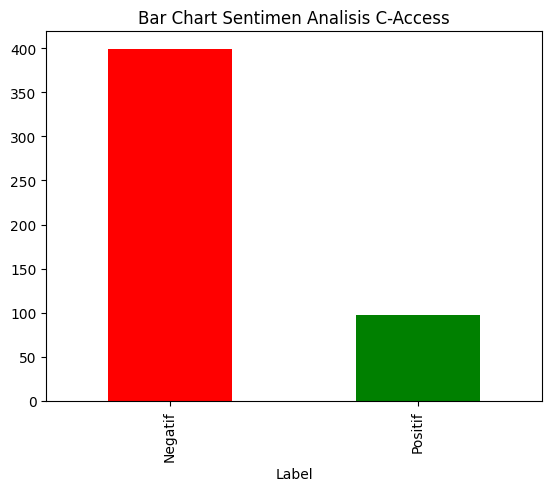

In [44]:
sentimen_data = pd.value_counts(df_visual['Label'], sort=True)
sentimen_data.plot(kind='bar', color=['red','green','green'])
plt.title('Bar Chart Sentimen Analisis C-Access')
plt.show()

### Manchine Learning

In [45]:
df_train = pd.read_csv('/content/data_labeling.csv')
df_train.head()

,userName,at,content,score,Label
0,Denniel Syahrul,2023-12-01 11:49:38,buka,2,Negatif
1,ghea asmarandhana,2023-12-02 02:27:15,mantap mudah mobilitas guna,5,Positif
2,Latifah Dena,2023-12-02 07:11:42,aplikasi bantu,5,Positif
3,Hidup Baru,2023-12-02 07:41:45,mantap,5,Positif
4,Dika Dewantara,2023-12-02 08:28:09,bantu jam datang kereta mudah saldo kmt antri ...,5,Positif


#### TF-IDF

##### Pembobotan TF-IDF

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import normalize

In [47]:
content = df_train['content']

###### TF

In [48]:
cv = CountVectorizer()
term_fit = cv.fit(content)

print("Jumlah kata dalam vocabulary:", len(term_fit.vocabulary_))

Jumlah kata dalam vocabulary: 774


In [49]:
term_fit.vocabulary_

{'buka': 114,
 'mantap': 426,
 'mudah': 455,
 'mobilitas': 450,
 'guna': 239,
 'aplikasi': 44,
 'bantu': 77,
 'jam': 292,
 'datang': 161,
 'kereta': 341,
 'saldo': 591,
 'kmt': 352,
 'antri': 35,
 'loket': 405,
 'suka': 656,
 'error': 199,
 'unduh': 740,
 'tidak': 698,
 'bisa': 102,
 'buna': 117,
 'daftar': 152,
 'spesial': 649,
 'bug': 111,
 'beda': 86,
 'kai': 318,
 'access': 3,
 'iya': 286,
 'akses': 13,
 'cek': 133,
 'coba': 141,
 'notif': 487,
 'jelas': 298,
 'banget': 72,
 'urus': 745,
 'capek': 129,
 'pas': 516,
 'masuk': 431,
 'akun': 17,
 'kendala': 338,
 'aneh': 29,
 'nyata': 496,
 'topup': 713,
 'doang': 184,
 'tolong': 709,
 'baik': 66,
 'nya': 491,
 'jelek': 300,
 'susah': 666,
 'kode': 356,
 'verifikasi': 752,
 'email': 192,
 'kayak': 329,
 'siapp': 631,
 'rilis': 582,
 'rute': 589,
 'harga': 250,
 'posisi': 546,
 'pakai': 512,
 'klr': 351,
 'diinstal': 176,
 'yaaa': 771,
 'baru': 80,
 'tunda': 725,
 'metode': 444,
 'bayar': 84,
 'beli': 87,
 'tiket': 699,
 'dana': 155,
 

In [50]:

# Kolom pertama ini berarti jumlah dokumen
# Kolom kedua berarti letak kata nya
# Kolom ketiga berarti hasil dari tf

term_frequency_all = term_fit.transform(content)
print(term_frequency_all)

  (0, 114)	1
  (1, 239)	1
  (1, 426)	1
  (1, 450)	1
  (1, 455)	1
  (2, 44)	1
  (2, 77)	1
  (3, 426)	1
  (4, 35)	1
  (4, 77)	1
  (4, 161)	1
  (4, 292)	1
  (4, 341)	1
  (4, 352)	1
  (4, 405)	1
  (4, 455)	1
  (4, 591)	1
  (5, 199)	1
  (5, 656)	1
  (6, 102)	1
  (6, 117)	1
  (6, 698)	1
  (6, 740)	1
  (7, 111)	1
  (7, 152)	1
  :	:
  (491, 697)	2
  (491, 698)	1
  (492, 298)	1
  (492, 698)	1
  (493, 44)	1
  (493, 173)	1
  (493, 197)	2
  (493, 502)	1
  (493, 513)	1
  (493, 542)	2
  (494, 44)	1
  (494, 62)	1
  (494, 88)	1
  (494, 102)	1
  (494, 192)	1
  (494, 364)	1
  (494, 400)	1
  (494, 524)	1
  (494, 597)	1
  (494, 682)	1
  (494, 698)	1
  (494, 718)	1
  (495, 44)	1
  (495, 300)	1
  (495, 713)	1


In [51]:
content_tf = content[0]
print(content_tf)

buka


In [52]:
term_frequency = term_fit.transform([content_tf])
print(term_frequency)

  (0, 114)	1


###### IDF

In [53]:
dokumen = term_fit.transform(content)
tfidf_transformer = TfidfTransformer().fit(dokumen)
print("IDF values:\n", tfidf_transformer.idf_)

IDF values:
 [6.10997774 6.51544285 5.41683056 4.4360013  6.51544285 6.51544285
 5.59915211 6.51544285 6.51544285 6.51544285 6.10997774 6.51544285
 6.51544285 4.26415105 6.51544285 6.10997774 6.51544285 4.50053982
 5.59915211 6.51544285 6.51544285 6.51544285 6.10997774 6.51544285
 6.51544285 5.82229566 6.10997774 6.51544285 6.51544285 4.72368338
 6.51544285 6.51544285 6.51544285 6.51544285 6.51544285 6.10997774
 6.51544285 5.12914848 6.51544285 6.51544285 6.51544285 6.51544285
 6.51544285 6.51544285 1.76185265 6.51544285 6.51544285 6.51544285
 6.10997774 6.51544285 6.51544285 6.51544285 5.26267988 6.51544285
 6.51544285 6.51544285 6.51544285 6.51544285 5.12914848 6.51544285
 6.10997774 6.51544285 6.10997774 3.71208246 6.51544285 6.51544285
 3.11424546 6.51544285 6.51544285 6.51544285 6.10997774 6.51544285
 3.44738991 6.51544285 6.10997774 6.10997774 5.82229566 4.07309581
 6.10997774 6.51544285 3.71208246 6.51544285 6.51544285 6.51544285
 4.64364067 6.51544285 5.59915211 6.10997774 6.51

In [54]:
# Menghitung TF-IDF
tfidf = tfidf_transformer.transform(term_frequency)
print("TF-IDF matrix:\n", tfidf)

TF-IDF matrix:
   (0, 114)	1.0


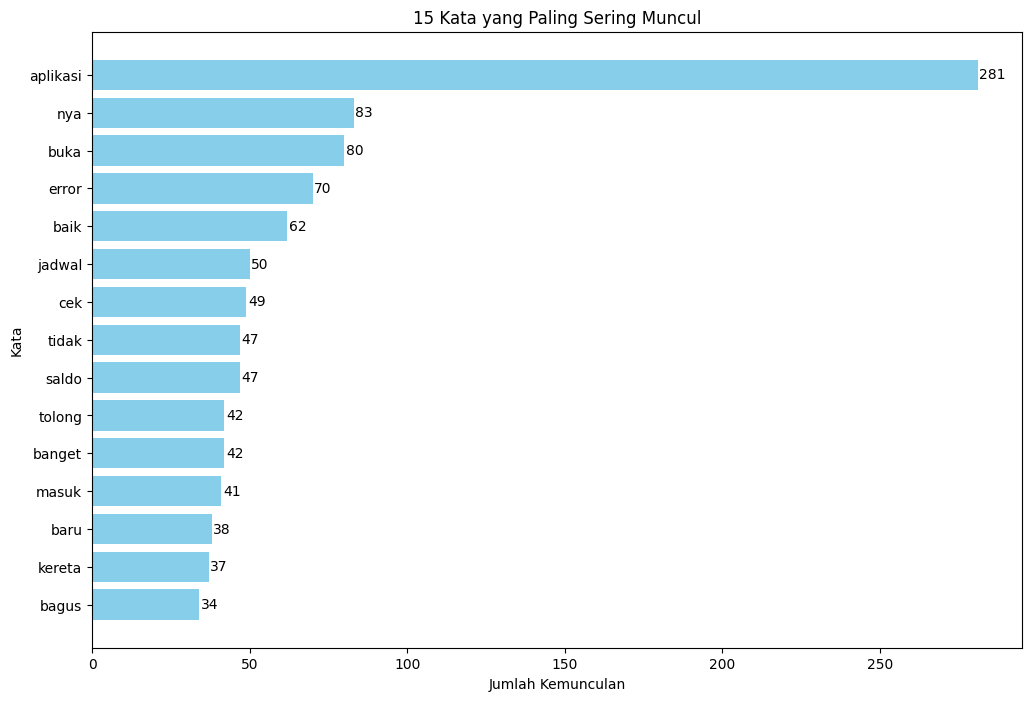

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Mendapatkan total frekuensi setiap kata
term_frequency_sum = term_frequency_all.sum(axis=0)

# Membuat DataFrame untuk kata dan frekuensinya
terms = cv.get_feature_names_out()
df_term_freq = pd.DataFrame(term_frequency_sum.T, index=terms, columns=["Count"])

# Mengurutkan kata berdasarkan frekuensi tertinggi
df_term_freq = df_term_freq.sort_values(by="Count", ascending=False)

# Mengambil 10 kata teratas
top_15_words = df_term_freq.head(15)

# Membuat bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(top_15_words.index, top_15_words["Count"], color='skyblue')

# Menambahkan garis di atas bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Kata')
plt.title('15 Kata yang Paling Sering Muncul')
plt.gca().invert_yaxis()  # Membalikkan sumbu y agar kata dengan frekuensi tertinggi berada di atas
plt.show()


##### PEMBOBOTAN TF-IDF SEBAGIAN DATA

In [56]:

# Mengambil baris ke-15 hingga ke-17
data = df_train.iloc[270:273]['content']

# Membuat model CountVectorizer untuk menghitung TF
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(data)

# Mendapatkan nama fitur (term)
terms = count_vectorizer.get_feature_names_out()

# Menghitung TF (Term Frequency) tanpa normalisasi
tf_matrix = count_matrix.toarray()

# Membuat model TF-IDF
tfidf_vectorizer = TfidfVectorizer(use_idf=True, norm=None)
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

# Normalisasi TF (Term Frequency)
tf_normalized = normalize(tf_matrix, norm='l2')

# Menghitung DF (Document Frequency)
df_vector = (tf_matrix > 0).sum(axis=0)

# Menghitung IDF (Inverse Document Frequency)
idf_vector = tfidf_vectorizer.idf_

# Menghitung TF-IDF
tfidf_normalized = tf_normalized * idf_vector

# Membuat DataFrame untuk setiap langkah
result = {
    'Term': terms,
    'TF (d270)': tf_matrix[0],
    'TF (d271)': tf_matrix[1],
    'TF (d272)': tf_matrix[2],

    'TF Normalized (d270)': tf_normalized[0],
    'TF Normalized (d271)': tf_normalized[1],
    'TF Normalized (d272)': tf_normalized[2],

    'DF': df_vector,
    'IDF': idf_vector,
    'TF-IDF (d270)': tfidf_normalized[0],
    'TF-IDF (d271)': tfidf_normalized[1],
    'TF-IDF (d272)': tfidf_normalized[2],

}

result_df = pd.DataFrame(result)
result_df


,Term,TF (d270),TF (d271),TF (d272),TF Normalized (d270),TF Normalized (d271),TF Normalized (d272),DF,IDF,TF-IDF (d270),TF-IDF (d271),TF-IDF (d272)
0,aplikasi,1,1,0,0.57735,0.301511,0.000000,2,1.287682,0.743444,0.388251,0.000000
1,baik,0,1,0,0.00000,0.301511,0.000000,1,1.693147,0.000000,0.510503,0.000000
2,bisa,0,1,0,0.00000,0.301511,0.000000,1,1.693147,0.000000,0.510503,0.000000
3,bug,0,1,0,0.00000,0.301511,0.000000,1,1.693147,0.000000,0.510503,0.000000
4,buka,0,0,1,0.00000,0.000000,0.707107,1,1.693147,0.000000,0.000000,1.197236
5,cacat,0,1,0,0.00000,0.301511,0.000000,1,1.693147,0.000000,0.510503,0.000000
6,cek,1,1,0,0.57735,0.301511,0.000000,2,1.287682,0.743444,0.388251,0.000000
7,iya,0,1,0,0.00000,0.301511,0.000000,1,1.693147,0.000000,0.510503,0.000000
8,jadwal,0,1,0,0.00000,0.301511,0.000000,1,1.693147,0.000000,0.510503,0.000000
9,mulu,0,1,0,0.00000,0.301511,0.000000,1,1.693147,0.000000,0.510503,0.000000


##### PEMBOBOTAN TF-IDF SELURUH DATA

In [57]:
data = df_train['content']

# Membuat model CountVectorizer untuk menghitung TF
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(data)

# Mendapatkan nama fitur (term)
terms = count_vectorizer.get_feature_names_out()

# Menghitung TF (Term Frequency) tanpa normalisasi
tf_matrix = count_matrix.toarray()

# Membuat model TF-IDF
tfidf_vectorizer = TfidfVectorizer(use_idf=True, norm=None)
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

# Normalisasi TF (Term Frequency)
tf_normalized = normalize(tf_matrix, norm='l2')

# Menghitung DF (Document Frequency)
df_vector = (tf_matrix > 0).sum(axis=0)

# Menghitung IDF (Inverse Document Frequency)
idf_vector = tfidf_vectorizer.idf_

# Menghitung TF-IDF
tfidf_normalized = tf_normalized * idf_vector

# Membuat DataFrame untuk setiap langkah
result = {
    'Term': terms,
}

# Menambahkan TF untuk setiap dokumen
for i in range(len(data)):
    result[f'TF (d{i})'] = tf_matrix[i]

# Menambahkan TF Normalized untuk setiap dokumen
for i in range(len(data)):
    result[f'TF Normalized (d{i})'] = tf_normalized[i]

result['DF'] = df_vector
result['IDF'] = idf_vector

# Menambahkan TF-IDF untuk setiap dokumen
for i in range(len(data)):
    result[f'TF-IDF (d{i})'] = tfidf_normalized[i]

result_df = pd.DataFrame(result)
result_df



Term  TF (d0)  TF (d1)  TF (d2)  TF (d3)  TF (d4)  TF (d5)  TF (d6)  \
0      abang        0        0        0        0        0        0        0   
1      accec        0        0        0        0        0        0        0   
2      acces        0        0        0        0        0        0        0   
3     access        0        0        0        0        0        0        0   
4     accses        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
769       ya        0        0        0        0        0        0        0   
770      yaa        0        0        0        0        0        0        0   
771     yaaa        0        0        0        0        0        0        0   
772  yaampun        0        0        0        0        0        0        0   
773      yah        0        0        0        0        0        0        0   

     TF (d7)  TF (d8)  TF (d9)  TF (d10)  TF (d11)  TF (d12)  TF (d13)  \
0          0        0        0         0         0         0         0   
1          0        0        0         0         0         0         0   
2          0        0        0         0         0         0         0   
3          0        1        0         0         0         0         0   
4          0        0        0         0         0         0         0   
..       ...      ...      ...       ...       ...       ...       ...   
769        0        0        0         0         0         0         0   
770        0        0        0         0         0         0         0   
771        0        0        0         0         0         0         0   
772        0        0        0         0         0         0         0   
773        0        0        0         0         0         0         0   

     TF (d14)  TF (d15)  TF (d16)  TF (d17)  TF (d18)  TF (d19)  TF (d20)  \
0           0         0         0         0         0         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
769         0         0         0         0         0         0         0   
770         0         0         0         0         0         0         0   
771         0         0         1         0         0         0         0   
772         0         0         0         0         0         0         0   
773         0         0         0         0         0         0         0   

     TF (d21)  TF (d22)  TF (d23)  TF (d24)  TF (d25)  TF (d26)  TF (d27)  \
0           0         0         0         0         0         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
769         0         0         0         0         0         0         0   
770         0         0         0         0         0         0         0   
771         0         0         0         0         0         0         0   
772         0         0         0         0         0         0         0   
773         0         0         0         0         0         0         0   

     TF (d28)  TF (d29)  TF (d30)  TF (d31)  TF (d32)  TF (d33)  TF (d34)  \
0           0         0         0         0         0         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           

#### Splitting Data

In [58]:
df_train['content'] = df_train['content'].fillna("Tidak ada komentar")

In [59]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train['content'], df_train['Label'],
                                                    test_size = 0.20,stratify=df_train['Label'],
                                                    random_state = 0)

In [60]:
# Mengetahui jumlah seluruh data
total_data = len(df_train)
print(f"Jumlah seluruh data: {total_data}")

# Mengetahui jumlah data latih
total_train_data = len(X_train)
print(f"Jumlah data latih: {total_train_data}")

# Mengetahui jumlah data uji
total_test_data = len(X_test)
print(f"Jumlah data uji: {total_test_data}")

Jumlah seluruh data: 496
Jumlah data latih: 396
Jumlah data uji: 100


In [61]:
import numpy as np

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [63]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(396,)
(396,)
(100,)
(100,)


In [65]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [66]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

#### Naivy Bayes

In [67]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [68]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [69]:
y_pred = nb.predict(tfidf_test)

#### Evaluasi Model

In [70]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)


In [71]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average="binary", pos_label="Negatif")
recall = recall_score(y_test, predicted, average="binary", pos_label="Negatif")
f1 = f1_score(y_test, predicted, average="binary", pos_label="Negatif")

print("MultinomialNB Accuracy:", accuracy)
print("MultinomialNB Precision:", precision)
print("MultinomialNB Recall:", recall)
print("MultinomialNB f1_score:", f1)
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))


MultinomialNB Accuracy: 0.84
MultinomialNB Precision: 0.8478260869565217
MultinomialNB Recall: 0.975
MultinomialNB f1_score: 0.9069767441860466

              precision    recall  f1-score   support

     Negatif       0.85      0.97      0.91        80
     Positif       0.75      0.30      0.43        20

    accuracy                           0.84       100
   macro avg       0.80      0.64      0.67       100
weighted avg       0.83      0.84      0.81       100



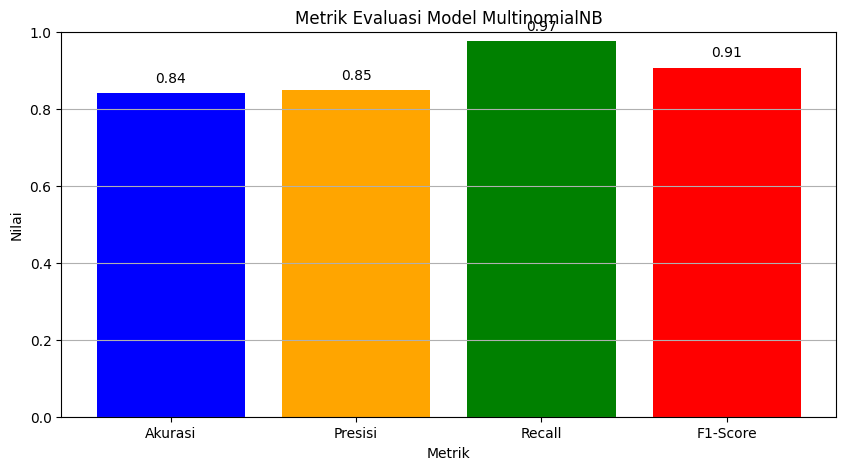

In [72]:

# Menyimpan metrik dalam sebuah dictionary
metrics = {
    'Akurasi': accuracy,
    'Presisi': precision,
    'Recall': recall,
    'F1-Score': f1
}

# Membuat chart bar
plt.figure(figsize=(10, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Mengatur batas y-axis dari 0 hingga 1
plt.title('Metrik Evaluasi Model MultinomialNB')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.grid(axis='y')

# Menambahkan nilai di atas setiap bar
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

# Menampilkan chart
plt.show()

In [73]:

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
df_train

confusion_matrix:
 [[78  2]
 [14  6]]

              precision    recall  f1-score   support

     Negatif       0.85      0.97      0.91        80
     Positif       0.75      0.30      0.43        20

    accuracy                           0.84       100
   macro avg       0.80      0.64      0.67       100
weighted avg       0.83      0.84      0.81       100



,userName,at,content,score,Label
0,Denniel Syahrul,2023-12-01 11:49:38,buka,2,Negatif
1,ghea asmarandhana,2023-12-02 02:27:15,mantap mudah mobilitas guna,5,Positif
2,Latifah Dena,2023-12-02 07:11:42,aplikasi bantu,5,Positif
3,Hidup Baru,2023-12-02 07:41:45,mantap,5,Positif
4,Dika Dewantara,2023-12-02 08:28:09,bantu jam datang kereta mudah saldo kmt antri ...,5,Positif
...,...,...,...,...,...
491,Putri Winny,2024-07-13 08:51:30,disambungin ojek online gopay tiba tiba bayar ...,2,Negatif
492,Bang Yudizz,2024-07-13 12:05:22,tidak jelas,1,Negatif
493,Mahyudin Azis,2024-07-13 12:30:03,aplikasi pler era online era digital paksa pler,1,Negatif
494,De Rifqi,2024-07-14 02:55:40,aplikasi kotor pencet login ttep bae tidak bis...,1,Negatif


In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predicted)

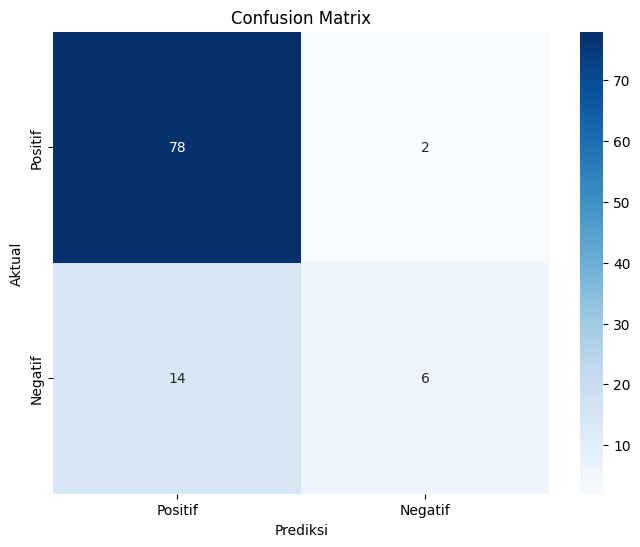

True Positive (TP): 6
True Negative (TN): 78
False Positive (FP): 2
False Negative (FN): 14


In [75]:
# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positif', 'Negatif'], yticklabels=['Positif', 'Negatif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

TN, FP, FN, TP = cm.ravel()
print(f'True Positive (TP): {TP}')
print(f'True Negative (TN): {TN}')
print(f'False Positive (FP): {FP}')
print(f'False Negative (FN): {FN}')

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung dan mencetak metrik evaluasi
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average='binary', pos_label='Negatif')
recall = recall_score(y_test, predicted, average='binary', pos_label='Negatif')
f1 = f1_score(y_test, predicted, average='binary', pos_label='Negatif')

# Menampilkan hasil
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Sensitivitas (Recall): {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Akurasi: 0.84
Presisi: 0.85
Sensitivitas (Recall): 0.97
F1-Score: 0.91


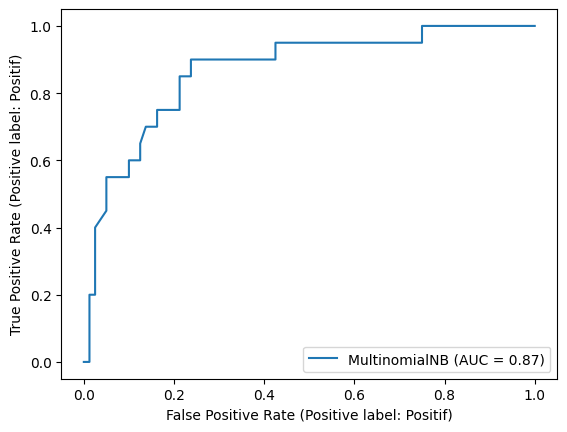

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay
RocCurveDisplay.from_estimator(clf, X_test, y_test)